# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 4: Taking advantage of Vectorizaiton and Broadcasting 

## Understanding Vectorization and Broadcasting (V&B)

### Example of using V&B to improve performance 

In [1]:
import numpy as np

array1 = np.random.random(10000000)
array2 = np.random.random(10000000)

In [2]:
def code_it_ourselves():
    answer =[]
    
    for i in range(len(array1)):
        answer.append(array1[i]*array2[i])
        
    return answer


In [3]:
import time
t0 = time.time()
code_it_ourselves()
print(time.time()-t0)

3.2461423873901367


In [4]:
def vectorize_it():        
    return (array1*array2)

In [5]:
t0 = time.time()
vectorize_it()
print(time.time()-t0)

0.031049251556396484


In [6]:
12.65/0.087

145.40229885057474

In [7]:
%%time
vectorize_it()

Wall time: 18 ms


array([0.20031195, 0.3188034 , 0.00475352, ..., 0.34024272, 0.12504929,
       0.45258929])

In [8]:
%%time
code_it_ourselves()

Wall time: 3.56 s


[0.20031194662115256,
 0.3188033984558515,
 0.0047535244507200865,
 0.017781999993185856,
 0.763215054257511,
 0.15180680844073682,
 0.8530119528529639,
 0.11655341537471232,
 0.15003845755068526,
 0.2732090020623183,
 0.23956044935363408,
 0.5913410506969519,
 0.048847573201019664,
 0.09596282244143862,
 0.02530816259102639,
 0.04149665523031372,
 0.572373340301663,
 0.5522340094147885,
 0.398636155715269,
 0.703041413585229,
 0.024487300163969942,
 0.7719762723153136,
 0.04339300761544963,
 0.20002750834651178,
 0.18818841178283674,
 0.6162404753318038,
 0.09813241596884023,
 0.24943548628549383,
 0.0339648888484162,
 0.020813231168810065,
 0.4718212644042951,
 0.05747069816749837,
 0.1791219339946435,
 0.029949168869492,
 0.045393311048366414,
 0.3675458933682143,
 0.713347610046808,
 0.22761102920946877,
 0.273130052683255,
 0.3516197513717447,
 0.09065179051531204,
 0.8400759455914916,
 0.24893064064630463,
 0.10479847903993389,
 0.38795467643991416,
 0.028943698312904755,
 0.5498

### Vectorization vs. Broadcasting

In [9]:
import numpy as np
array1 = np.random.random(100)
array2 = np.random.random(100)
array1**array2

array([0.74542807, 0.89906571, 0.97442391, 0.74274186, 0.21754594,
       0.82970984, 0.91805215, 0.99245812, 0.81394342, 0.82222614,
       0.79875332, 0.93096599, 0.09690265, 0.32281109, 0.94551169,
       0.35112625, 0.81118765, 0.4181125 , 0.38418256, 0.95768107,
       0.31149981, 0.80395503, 0.24013997, 0.67974787, 0.94928237,
       0.69141182, 0.75645049, 0.53610193, 0.734823  , 0.80835444,
       0.8907639 , 0.82595121, 0.49983143, 0.11712862, 0.90720841,
       0.86758257, 0.40058773, 0.95107485, 0.45627773, 0.17186346,
       0.91550623, 0.88247506, 0.37718961, 0.23694002, 0.90232524,
       0.12334968, 0.81837473, 0.83252577, 0.90135857, 0.86346031,
       0.99010075, 0.71495861, 0.16139587, 0.61158165, 0.85133431,
       0.21134931, 0.83525432, 0.97851803, 0.55858412, 0.94509388,
       0.34639701, 0.30341035, 0.90042274, 0.33787182, 0.98053547,
       0.01189252, 0.92693401, 0.65487242, 0.20114298, 0.99061278,
       0.65415804, 0.21477405, 0.09186666, 0.46762269, 0.44870

In [10]:
import numpy as np
import pandas as pd

random_df = pd.DataFrame(
    {'Column1':np.random.choice([True,False],1000),
     'Column2':np.random.choice([True,False],1000)}
)
random_df.Column1 ^ random_df.Column2

0       True
1       True
2      False
3      False
4       True
       ...  
995     True
996    False
997    False
998    False
999     True
Length: 1000, dtype: bool

In [11]:
import numpy as np
my_array = np.random.randint(1,100,10)
my_array >= 50

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False])

In [23]:
import numpy as np
my_array = np.random.randint(1,100,10)
my_array % 2

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

### Understanding the strategy of V&B to improve performance

## Challenge 1: V&B, iterating, or mapping? 

In [27]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def one_experiment(n_rows):
    output, keep={}, []
    random_df = pd.DataFrame(
        {'C1': np.random.random(n_rows),
         'C2': np.random.random(n_rows)}
    )
    
    t0= time.time()
    for i,row in random_df.iterrows():
        keep.append(row.C1*row.C2)
    random_df['C3_iterate'] = keep
    output['iterate'] = time.time()-t0
    
    t0= time.time()
    random_df['C3_map'] = random_df.apply(
        lambda r:r.C1*r.C2,
        axis=1
    )
    output['apply'] = time.time()-t0
    
    t0= time.time()
    random_df['C3_map'] = list(
        map(
            lambda x,y:x*y,
            random_df.C1,
            random_df.C2
        )
    )
    output['map'] = time.time()-t0
    
    t0= time.time()
    random_df['C3_map'] =(
        random_df.C1 * random_df.C2
    ) 
    output['v&b'] = time.time()-t0
    return output

In [31]:
method_list = ['iterate','apply','map','v&b']
def experiments(n_rows,n_repeat):
    output = {m:0 for m in method_list}
    
    for _ in range(n_repeat):
        result = one_experiment(n_rows)
        output = {m:result[m]+output[m] 
                  for m in method_list}
    
    return {m:round(output[m]/n_repeat,5)
            for m in method_list}

In [32]:
experiments(1000,5)

{'iterate': 0.00685, 'apply': 0.00246, 'map': 0.0, 'v&b': 0.0002}

In [40]:
experiments(50000,3)

{'map': 0.02133, 'v&b': 0.00017}

In [34]:
exp_options = [10**i for i in range(2,6)]
result_df = pd.DataFrame(index = exp_options, 
                         columns = method_list)
print(result_df)

       iterate apply  map  v&b
100        NaN   NaN  NaN  NaN
1000       NaN   NaN  NaN  NaN
10000      NaN   NaN  NaN  NaN
100000     NaN   NaN  NaN  NaN


In [35]:
for o in exp_options:
    result_df.loc[o] = experiments(o,5)
print(result_df)

        iterate    apply      map      v&b
100     0.00498  0.00522  0.00055  0.00052
1000    0.04971  0.02992  0.00012   0.0001
10000   0.49734  0.26125  0.00693  0.00056
100000  5.49154   2.1965  0.03238  0.00061


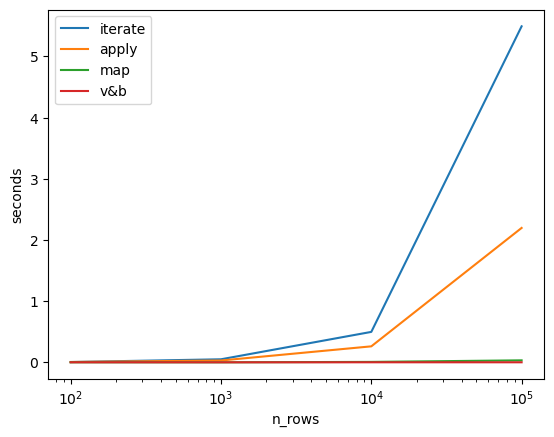

In [36]:
for m in method_list:
    result_df[m].plot(logx=True)
plt.xlabel('n_rows')
plt.ylabel('seconds')
plt.legend()
plt.savefig('images/challenge1_8.png',dpi=500)

## Challenge 2: V&B or Boolean Masking? 

In [1]:
import pandas as pd
import numpy as np
n_rows = 10**7
person_df = pd.DataFrame(index=range(n_rows), 
                         columns=['Height','Weight'])
person_df.Height = np.random.normal(178,10,n_rows)
person_df.Weight = np.random.normal(83,7,n_rows)
print(person_df)

             Height     Weight
0        198.211619  76.353825
1        183.640968  87.118015
2        185.528104  88.790797
3        181.540663  73.581704
4        171.913887  76.248489
...             ...        ...
9999995  173.390184  88.579921
9999996  175.032356  75.845335
9999997  174.422218  88.192510
9999998  170.078586  85.633225
9999999  184.493375  85.000920

[10000000 rows x 2 columns]


In [3]:
person_df['Gender'] = np.random.binomial(1,0.5,n_rows)
print(person_df)

             Height     Weight        BMI  Gender
0        198.211619  76.353825  19.434464       1
1        183.640968  87.118015  25.832642       0
2        185.528104  88.790797  25.795773       1
3        181.540663  73.581704  22.326570       0
4        171.913887  76.248489  25.799383       1
...             ...        ...        ...     ...
9999995  173.390184  88.579921  29.463632       0
9999996  175.032356  75.845335  24.756668       1
9999997  174.422218  88.192510  28.988657       1
9999998  170.078586  85.633225  29.603498       1
9999999  184.493375  85.000920  24.972503       0

[10000000 rows x 4 columns]


## Challenge 3: Deep nested loops or shallow loopless codes? 

In [67]:
import pandas as pd
election_df = pd.read_csv('countypres_2000-2020.csv')
print(election_df.head())

   year    state state_po county_name  county_fips        office  \
0  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
1  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
2  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
3  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
4  2000  ALABAMA       AL     BALDWIN       1003.0  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            4942       17208  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN           11993       17208  20220315  TOTAL  
2     RALPH NADER       GREEN             160       17208  20220315  TOTAL  
3           OTHER       OTHER             113       17208  20220315  TOTAL  
4         AL GORE    DEMOCRAT           13997       56480  20220315  TOTAL  


In [1]:
import pandas as pd
election_df = pd.read_csv('https://www.dropbox.com/scl/fi/uy4c4r25sa4cfr3i0u6x9/countypres_2000-2020.csv?rlkey=knagejjtlaxw60dg84y8ar99w&dl=1')
print(election_df.head())

   year    state state_po county_name  county_fips        office  \
0  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
1  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
2  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
3  2000  ALABAMA       AL     AUTAUGA       1001.0  US PRESIDENT   
4  2000  ALABAMA       AL     BALDWIN       1003.0  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            4942       17208  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN           11993       17208  20220315  TOTAL  
2     RALPH NADER       GREEN             160       17208  20220315  TOTAL  
3           OTHER       OTHER             113       17208  20220315  TOTAL  
4         AL GORE    DEMOCRAT           13997       56480  20220315  TOTAL  


In [68]:
us_counties = (
    election_df.state_po +
    ' - ' +
    election_df.county_name
).unique()
print(us_counties)

print(len(us_counties))

['AL - AUTAUGA' 'AL - BALDWIN' 'AL - BARBOUR' ... 'VA - WAYNESBORO CITY'
 'VA - WILLIAMSBURG CITY' 'VA - WINCHESTER CITY']
3193


In [69]:
yuma_df = (election_df
 .query('state_po == "AZ"')
 .query('county_name == "YUMA"')
)
print(yuma_df)

       year    state state_po county_name  county_fips        office  \
324    2000  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
325    2000  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
326    2000  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
327    2000  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
12707  2004  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
12708  2004  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
12709  2004  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
22058  2008  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
22059  2008  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
22060  2008  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
31409  2012  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
31410  2012  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
31411  2012  ARIZONA       AZ        YUMA       4027.0  US PRESI

In [70]:
BM = yuma_df['party'].isin(['DEMOCRAT','REPUBLICAN'])
yuma_df = (
    yuma_df[BM]
    .copy()
)
print(yuma_df)

       year    state state_po county_name  county_fips        office  \
324    2000  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
325    2000  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
12707  2004  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
12708  2004  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
22058  2008  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
22059  2008  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
31409  2012  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
31410  2012  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
40760  2016  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
40761  2016  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
51140  2020  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
51141  2020  ARIZONA       AZ        YUMA       4027.0  US PRESIDENT   
51142  2020  ARIZONA       AZ        YUMA       4027.0  US PRESI

In [71]:
yuma_df = (
    yuma_df
    .groupby(
        ['year','state_po','county_name','party']
    ).candidatevotes
    .sum()
    .reset_index()
)
print(yuma_df)

    year state_po county_name       party  candidatevotes
0   2000       AZ        YUMA    DEMOCRAT           12055
1   2000       AZ        YUMA  REPUBLICAN           15708
2   2004       AZ        YUMA    DEMOCRAT           16032
3   2004       AZ        YUMA  REPUBLICAN           22184
4   2008       AZ        YUMA    DEMOCRAT           18559
5   2008       AZ        YUMA  REPUBLICAN           24577
6   2012       AZ        YUMA    DEMOCRAT           18059
7   2012       AZ        YUMA  REPUBLICAN           23352
8   2016       AZ        YUMA    DEMOCRAT           24605
9   2016       AZ        YUMA  REPUBLICAN           25165
10  2020       AZ        YUMA    DEMOCRAT           32210
11  2020       AZ        YUMA  REPUBLICAN           36534


In [72]:
total_df = yuma_df.groupby('year').candidatevotes.sum()
print(total_df)

yuma_df['percentvotes'] = None
for i, row in yuma_df.iterrows():
    yuma_df.at[i, 'percentvotes'] = (
        row.candidatevotes / total_df.loc[row.year]
    )
print(yuma_df)

year
2000    27763
2004    38216
2008    43136
2012    41411
2016    49770
2020    68744
Name: candidatevotes, dtype: int64
    year state_po county_name       party  candidatevotes percentvotes
0   2000       AZ        YUMA    DEMOCRAT           12055     0.434211
1   2000       AZ        YUMA  REPUBLICAN           15708     0.565789
2   2004       AZ        YUMA    DEMOCRAT           16032      0.41951
3   2004       AZ        YUMA  REPUBLICAN           22184      0.58049
4   2008       AZ        YUMA    DEMOCRAT           18559     0.430244
5   2008       AZ        YUMA  REPUBLICAN           24577     0.569756
6   2012       AZ        YUMA    DEMOCRAT           18059     0.436092
7   2012       AZ        YUMA  REPUBLICAN           23352     0.563908
8   2016       AZ        YUMA    DEMOCRAT           24605     0.494374
9   2016       AZ        YUMA  REPUBLICAN           25165     0.505626
10  2020       AZ        YUMA    DEMOCRAT           32210      0.46855
11  2020       AZ       

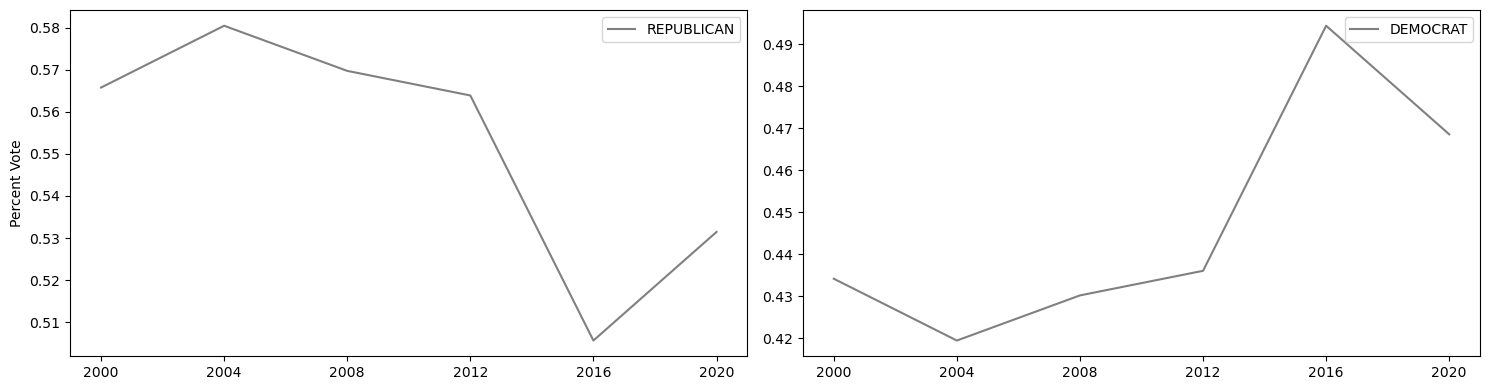

In [73]:
import matplotlib.pyplot as plt
import numpy as np

rep_BM = yuma_df.party == 'REPUBLICAN'
dem_BM = yuma_df.party == 'DEMOCRAT'

rep_sr = yuma_df[rep_BM].reset_index()
dem_sr = yuma_df[dem_BM].reset_index()

x = np.arange(6)

f,axes = plt.subplots(1,2,figsize=(15,4))
rep_sr.percentvotes.plot(ax = axes[0], label='REPUBLICAN',c='gray')
axes[0].set_ylabel('Percent Vote')
axes[0].set_xticks(x)
axes[0].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[0].legend()

dem_sr.percentvotes.plot(ax = axes[1], label='DEMOCRAT',c='gray')
axes[1].set_xticks(x)
axes[1].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[1].legend()

plt.legend()
plt.tight_layout()
plt.savefig('images/challenge3_6.png',dpi=500)

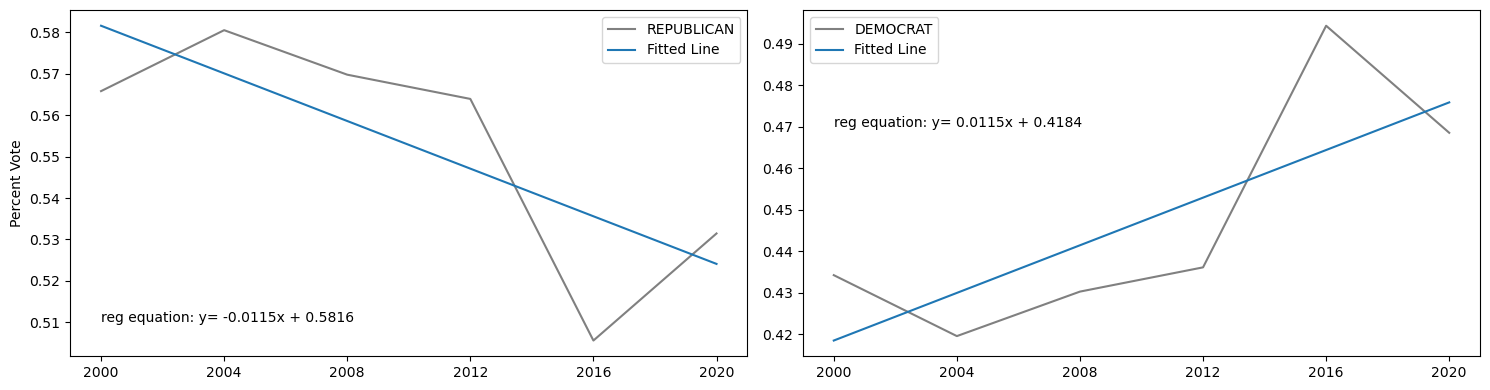

In [74]:
from scipy.optimize import curve_fit
def linear_function(x,a,b):
    return a*x+b

x = np.arange(6)

f,axes = plt.subplots(1,2,figsize=(15,4))
rep_sr.percentvotes.plot(ax = axes[0], label='REPUBLICAN',c='gray')
p,_ = curve_fit(linear_function,x,rep_sr.percentvotes.values)
axes[0].plot(x,linear_function(x,p[0],p[1]),label='Fitted Line')
axes[0].annotate(xy=(0,0.51),
                text = f'reg equation: y= {p[0]:.4f}x + {p[1]:.4f}')
axes[0].set_ylabel('Percent Vote')
axes[0].set_xticks(x)
axes[0].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[0].legend()

dem_sr.percentvotes.plot(ax = axes[1], label='DEMOCRAT',c='gray')
p,_ = curve_fit(linear_function,x,dem_sr.percentvotes.values)
axes[1].plot(x,linear_function(x,p[0],p[1]),label='Fitted Line')
axes[1].annotate(xy=(0,0.47),
                text = f'reg equation: y= {p[0]:.4f}x + {p[1]:.4f}')

axes[1].set_xticks(x)
axes[1].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[1].legend()

plt.legend()
plt.tight_layout()
plt.savefig('images/challenge3_8.png',dpi=500)

In [90]:
BM = election_df.party.isin(['DEMOCRAT','REPUBLICAN'])

param_df = pd.DataFrame(
    election_df[['state_po','county_name','party']]
    [BM].copy()
    .drop_duplicates()
    .reset_index(drop=True)
    .assign(slope=None)
    .assign(intercept=None)
    .set_index(['state_po','county_name','party'])
    .unstack()
)
print(param_df)

                        slope            intercept           
party                DEMOCRAT REPUBLICAN  DEMOCRAT REPUBLICAN
state_po county_name                                         
AK       DISTRICT 1      None       None      None       None
         DISTRICT 10     None       None      None       None
         DISTRICT 11     None       None      None       None
         DISTRICT 12     None       None      None       None
         DISTRICT 13     None       None      None       None
...                       ...        ...       ...        ...
WY       SWEETWATER      None       None      None       None
         TETON           None       None      None       None
         UINTA           None       None      None       None
         WASHAKIE        None       None      None       None
         WESTON          None       None      None       None

[3193 rows x 4 columns]


In [82]:
parties = ['DEMOCRAT','REPUBLICAN']

for state, county in param_df.index:
    BM = election_df.state_po == state
    BM = BM & (election_df.county_name ==county)
    
    county_df = (
        election_df[BM]
        .groupby(['year','party'])
        .candidatevotes
        .sum()
        .reset_index()
    )
    
    total_df = (
        county_df
        .groupby('year')
        .candidatevotes
        .sum()
    )
    
    if len(total_df)<2 or total_df.sum()==0:
        continue
    
    for party in parties:
        BM = county_df.party == party
        party_df = county_df[BM].copy()
        
        if party_df.empty:
            continue
            
        party_df['percentvotes'] = None
        
        for i, row in party_df.iterrows():
            party_df.at[i, 'percentvotes'] = (
                row.candidatevotes / total_df.loc[row.year]
            )
            
        
        
        party_df.percentvotes = (
            party_df.percentvotes.fillna(
                party_df.percentvotes.median()
            )
        )
        
        p,_ = curve_fit(linear_function,
                        np.arange(len(party_df)),
                        party_df.percentvotes.values)
        
        param_df.loc[
            (state,county),('slope',party)
        ] = p[0]
        param_df.loc[
            (state,county),('intercept',party)
        ] = p[1]

<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\roy_jafari\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be

Wall time: 1min


In [83]:
param_df

slope            intercept           
party                 DEMOCRAT REPUBLICAN  DEMOCRAT REPUBLICAN
state_po county_name                                          
AK       DISTRICT 1   0.038418  -0.037873  0.233395   0.699121
         DISTRICT 10 -0.017341   0.021503  0.310962    0.61846
         DISTRICT 11 -0.001146   0.007919  0.256032   0.663277
         DISTRICT 12 -0.006977   0.012632  0.278512   0.647397
         DISTRICT 13  0.003017   0.006932   0.31033   0.590013
...                        ...        ...       ...        ...
WY       SWEETWATER  -0.030532   0.025256  0.362055    0.60171
         TETON        0.042895  -0.043251  0.443231   0.503325
         UINTA       -0.017252   0.008237   0.24697   0.724088
         WASHAKIE    -0.012725   0.004297  0.225679   0.756872
         WESTON      -0.015821   0.013587  0.176554   0.794524

[3193 rows x 4 columns]

## Challenge 4: Matrix Multiplication or Loops?

In [1]:
import numpy as np
import pandas as pd
n = 19

In [2]:
W = np.array([
    [0 ,12,36,28,52,44,110,126,94, 63,130,102, 65,98,132,132,126,120,126],
    [12,0 ,24,75,82,75,108, 70,124, 86,93,106, 58,124,161,161,70 ,64, 70],
    [36,24,0 ,47 ,71 ,47 ,110,73,126,71, 95,110, 46,127,163,163,73,67,73],
    [28,75,47,0, 42,34,148,111,160, 52,94,148,49,117,104,109,111,105,111],
    [52,82,71,42,0 ,42,125,136,102,22,73,125, 32, 94,130,130,136,130,136],
    [44,75,47,34,42,0,148,111,162, 52, 96,148,49,117,152,152,111,105,111],
    [110,108,110,148,125,148,0 ,46,46 ,136,47,30,108,51,79,79,46, 47, 41],
    [126,70,73,111,136,111,46,0 ,69,141,63 ,46,119,68,121,121,27, 24, 36],
    [94,124,126,160,102,162,46 ,69,0 ,102,34 ,45 ,84 ,23 ,80,80,69,64,51],
    [63,86,71,52,22,52,136,141,102,0 ,64,118,29 ,95 ,131,131,141,135,141],
    [130,93 ,95,94,73,96,47 ,63 ,34,64,0 ,47 ,56 ,54 ,94 ,94 ,63 ,46 ,24],
    [102,106,110,148,125,148,30 ,46 ,45,118,47,0 ,100,51 ,89,89,46,40,36],
    [65,58,46,49 ,32 ,49,108,119,84,29,56,100,0 ,77 ,113,113,119,113,119],
    [98,124,127,117,94 ,117,51 ,68,23,95,54 ,51,77,0 ,79 ,79 ,68 ,62 ,51],
    [132,161,163,104,130,152,79,121,80,131,94,89,113,79,0,10,113,107,119],
    [132,161,163,109,130,152,79,121,80,131,94,89,113,79,10,0,113,107,119],
    [126,70,73,111,136,111,46, 27,69,141, 63, 46,119,68,113,113,0 ,6 ,24],
    [120,64,67,105,130,105,47, 24,64,135,46, 40,113, 62,107,107, 6,0 ,12],
    [126,70,73,111,136,111,41,36,51,141,24, 36,119, 51,119,119, 24, 12,0]
])

In [3]:
D = np.array([
    [0,76687,0,415,545,819,135,1368,819,5630,0,3432,9082,1503,0,0,13732,1368,1783],
    [76687, 0,40951,4118,5767,2055,1917,2746,1097,5712, 0, 0,0,268,0,1373,268,0,0],
    [0,40951, 0,3848,2524,3213,2072,4225,566, 0, 0,404,9372,0,972, 0,13538,1368,0],
    [415,4118,3848,  0,256,  0,  0,  0,  0,829,128,  0,  0,  0,  0,  0,  0,  0, 0],
    [545,5767,2524,256,  0,  0,  0,  0, 47,1655,287,  0, 42,  0,  0,  0,226, 0, 0],
    [819,2055,3213,  0,  0,  0,  0,  0,  0,926,161,  0,  0,  0,  0,  0,  0,  0, 0],
    [135,1917,2072,  0,  0,  0,  0,  0,196,1538,196, 0,  0,  0,  0,  0,  0,  0, 0],
    [1368,2746,4225, 0,  0,  0,  0,  0,  0,  0,301,  0,  0,  0,  0,  0,  0,  0, 0],
    [819,1097,566,   0, 47,  0,196,  0,  0,1954,418, 0,  0,  0,  0,  0,  0,  0, 0],
    [5630,5712,  0,829,1655,926,1538,  0,1954,  0,  0,282,0, 0,  0,  0,  0,  0, 0],
    [0,  0,  0,128,287,161, 196, 301, 418,  0,  0,1686,  0,  0,  0,  0, 226, 0, 0],
    [3432,  0,404,  0,  0,  0,  0,  0,  0,282,1686,  0,  0,  0,  0,  0,  0,  0, 0],
    [9082,  0,9372,  0, 42, 0,  0,  0,  0,  0,  0,   0,  0,  0,  0,  0,  0,  0, 0],
    [1503,268,  0,  0,  0,  0,  0,  0,  0,  0,  0,   0,  0,  0,  0,  0,  0,  0, 0],
    [0,  0, 972, 0,  0,  0,  0,  0,  0,  0,  0,  0,   0,  0,  0,99999,   0,  0, 0],
    [0,1373,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,99999,  0,   0,  0, 0],
    [13732,268,13538,0,226,  0,  0,  0,  0,  0,226,  0,  0,  0,  0,  0,  0,  0, 0],
    [1368,  0,1368,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0],
    [1783,  0,  0,   0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0]
])

In [4]:
np.random.permutation(n)

array([12, 14,  2,  3, 16,  9,  7, 11,  8,  6, 10,  4, 17,  5, 13,  1,  0,
       15, 18])

In [7]:
import math
math.factorial(n)

121645100408832000

In [8]:
def get_matrix(choro):
    n = len(choro)
    X = np.zeros((n,n))
    X[np.arange(n),choro] = np.ones(n)
    return X.astype(int)

In [9]:
opt_seq = (9,10,7,18,14,19,13,17,6,11,4,5,12,8,15,16,1,2,3)
opt_choro = np.array(opt_seq)-1
X = get_matrix(opt_choro)
print(X)

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [10]:
def f(i,X):
    out= 0 
    n = len(X)
    for k in range(n):
        out += k*X[i,k]
    return int(out)

In [11]:
def Z_loop(X):
    Z,n = 0,len(X)
    for i in range(n):
        for j in range(n):
            Z += W[i,j]*D[f(i,X),f(j,X)]
    return Z

In [12]:
opt_seq = (9,10,7,18,14,19,13,17,6,11,4,5,12,8,15,16,1,2,3)
opt_choro = np.array(opt_seq)-1
opt_X = get_matrix(opt_choro)

print(Z_loop(opt_X))

17212548


In [13]:
def z_vb(X):
    return np.trace(W@X@D@X.T)

In [14]:
print(z_vb(opt_X))

17212548


In [15]:
import time
functions = {'loop':Z_loop,'vb':z_vb}
n_repeat = 1000
for method,Z in functions.items():
    t0 = time.time()
    for _ in range(n_repeat):
        Z(opt_X)
    ave_runtime = (time.time()-t0)/n_repeat
    print(f'{method} average runtime: {ave_runtime:.6f}')

loop average runtime: 0.007417
vb average runtime: 0.000049


In [16]:
0.005105*math.factorial(n)/60/60/24/365

19691724.936170958

In [17]:
0.000047*math.factorial(n)/60/60/24/365

181295.01900098627

In [18]:
0.004820/0.000050

96.39999999999999

In [29]:
class chromosome(object):
    def __init__(self,perm = [],n=19):
        self.n = n
        if perm:
            self.perm = np.array(perm)
        else:
            self.perm = np.random.permutation(self.n)

            
        self.X = get_matrix(self.perm)
        self.obj = z_vb(self.X)
        
    def __repr__(self):
        rep = f'''permutation:{self.perm}
        Objective value = {self.obj}'''
        return rep

In [31]:
c1 = chromosome(n=19)
print(c1)

permutation:[ 6 13 15 10  8  0  1  5  3  2  9 16 12 18  4 14 17 11  7]
        Objective value = 88626684


In [32]:
class population(object):
    def __init__(self,n_cells=19,n_members=100):
        self.n_pop = n_members     
        self.members = [
            chromosome(n=n_cells) for i in range(100)]
        self.probs = None
        self.best = None

In [33]:
pop = population(n_cells=19)
print(pop.members[0])

permutation:[18 17  8  7 16  0 11  3  9 15 14 10  6  2  5 13  4  1 12]
        Objective value = 53175450


In [23]:
def get_probs(population):
    work_df = pd.DataFrame(
        {'obj': [chro.obj for chro in population]}
    )
    
    work_df['normalized'] = (
        (work_df.obj - work_df.obj.min())
        /
        (work_df.obj.max() - work_df.obj.min())
    )
    
    work_df['score'] = 1 - work_df.normalized
    
    total_score = work_df.score.sum()
    work_df['prob'] = work_df.score/total_score
    
    work_df = work_df.sort_values('prob',ascending=False)
    
    work_df['cumalative'] = work_df.prob.cumsum()
    
    return work_df[['prob','cumalative']]

In [24]:
get_probs(pop.members)

,prob,cumalative
2,0.018371,0.018371
90,0.018105,0.036476
97,0.017688,0.054164
64,0.017134,0.071298
94,0.016656,0.087954
...,...,...
50,0.000882,0.998696
7,0.000770,0.999466
34,0.000322,0.999787
54,0.000213,1.000000


In [25]:
class population(object):
    def __init__(self,n_cells=19,n_members=100):
        self.n_pop = n_members     
        self.members = [
            chromosome(n=n_cells) for i in range(100)]
        
        self.probs = get_probs(self.members)
        self.best = self.members[self.probs.iloc[0].name]

In [26]:
pop = population()
print(pop.best)

permutation:[18  6 12  7 10  9  5  3  4 13  1 14  8 15 17 11  2  0 16]
        Objective value = 38095024


In [79]:
class population(object):
    def __init__(self,members = [], 
                 n_members=100, n_cells=19):
                
        if members:
            self.n_cells = members[0].n
            self.n_pop = len(members)
            self.members = members
        else:
            self.n_cells = n_cells
            self.n_pop = n_members
            self.members = [chromosome(n=self.n_cells) 
                            for i in range(self.n_pop)]
            
        
        self.probs = get_probs(self.members)
        self.best = self.members[self.probs.iloc[0].name]
        
    def pick_members(self, n=1):
        members = []
        for random_num in np.random.random(n):
            BM = (self.probs.cumalative>=random_num)
            index = self.probs[BM].iloc[0].name
            members.append(self.members[index])
        
        return members    

In [89]:
pop = population(n_members=n_pop, n_cells=19)

In [90]:
pop.probs

,prob,cumalative
78,0.017625,0.017625
29,0.017303,0.034928
94,0.017046,0.051974
44,0.016910,0.068884
77,0.016861,0.085745
...,...,...
35,0.003055,0.993828
66,0.002900,0.996728
43,0.002736,0.999464
10,0.000536,1.000000


In [91]:
one_chro =pop.pick_members(n=1)[0]
print(one_chro)

permutation:[ 2  7 12  4  5  1 18 14  8 17 16  3 13 11 10  6 15  9  0]
        Objective value = 43529664


In [92]:
def mutate(chro,severity=0.25):
    n_changes = int(np.round(severity*chro.n))
    
    new_chro = chro.perm.copy()
    for _ in range(n_changes):
        random_cells = np.random.randint(0,n,2)
        if random_cells[0] == random_cells[1]:
            continue
            
        keep = new_chro[random_cells[0]]
        new_chro[random_cells[0]
                ] = new_chro[random_cells[1]]
        new_chro[random_cells[1]] = keep
    
    return chromosome(new_chro.tolist())

In [93]:
one_chro =pop.pick_members(n=1)[0]
print(one_chro)
print(mutate(one_chro))

permutation:[10 14 13  4 15 18  7 11  1  2 17  0 12 16  5  8  9  6  3]
        Objective value = 51344900
permutation:[10 14 13  4  9 18  7 11  1  2 17 16 12 15  5  0  6  8  3]
        Objective value = 69528530


In [94]:
def cross_over(chro1,chro2):
    n_cells = chro1.n
    n_change = int(np.round(n_cells/2))
    
    randm_index = np.random.permutation(n_cells)
    stay_chro1 = randm_index[:n_change]
    stay_chro2 = randm_index[n_change:]
    
    
    child1 = chro1.perm.copy()
    child2 = chro2.perm.copy()
    
    child1[stay_chro2] = -1
    child2[stay_chro1] = -1
    
    
    exist1 = [i for i in child1 if i!=-1]
    exist2 = [i for i in child2 if i!=-1]
    
    not_filled1 = chro1.perm[stay_chro2].tolist()
    not_filled2 = chro2.perm[stay_chro1].tolist()
    
    order1 = [i for i in chro2.perm if i in not_filled1]
    order2 = [i for i in chro1.perm if i in not_filled2]
    
        
    child1[sorted(stay_chro2)] = order1
    child2[sorted(stay_chro1)] = order2
    
    return (
        chromosome(perm=child1.tolist()),
        chromosome(perm=child2.tolist())
    )
    

In [95]:
chros = pop.pick_members(n=2)
print(chros)
print(cross_over(chros[0],chros[1]))

[permutation:[ 1 11  8  6 10  0  9  2  4 16 15 14  5  3  7 12 18 13 17]
        Objective value = 51033764, permutation:[14  7  4 16  5 15 13 10  3 11 18 17  8  9  1  0  2 12  6]
        Objective value = 42597710]
(permutation:[ 1 11  7 16 10  0  9  2  4 15 13 14  5  3 18 17  8 12  6]
        Objective value = 60133414, permutation:[ 8 10  4 16  9 15 14  5  3 11 18  7 13 17  1  0  2 12  6]
        Objective value = 62941792)


In [133]:
%%time
n_pop =  100

n_elit = np.round(0.05*n_pop).astype(int)
n_new = np.round(0.1*n_pop).astype(int)
n_mutate = np.round(0.2*n_pop).astype(int)
n_cross = np.round(0.65*n_pop).astype(int)

pop = population(n_members=n_pop, n_cells=19)

for _ in range(100):
    next_pop = pop.pick_members(n_elit-1)
    next_pop.append(pop.best)
    
    next_pop.extend(
        [chromosome(n=19) for i in range(n_new)])

    for _ in range(n_mutate):
        next_pop.append(mutate(pop.pick_members()[0],
                               severity=0.5))

    for _ in range(n_cross//2+1):
        chros = pop.pick_members(2)
        next_pop.extend(
            cross_over(chros[0],chros[1]))


    while len(next_pop)>100:
        next_pop.pop()
    pop = population(members = next_pop)
    #print(pop.best)
print(pop.best)

permutation:[ 4  3  9  8  7  5 12 11 13 10 16 17 18  6 15 14  2  1  0]
        Objective value = 21106332
Wall time: 3.64 s


In [126]:
pop = population(n_members=10000, n_cells=19)
pop.best

permutation:[18 13  8  6 15  4  9  2  3 17 16  7 14 11 10  5 12  0  1]
        Objective value = 27080558

In [134]:
class chromosome(object):
    def __init__(self,perm = [],n=19):
        self.n = n
        if perm:
            self.perm = np.array(perm)
        else:
            self.perm = np.random.permutation(self.n)

            
        self.X = get_matrix(self.perm)
        self.obj = Z_loop(self.X)
        
    def __repr__(self):
        rep = f'''permutation:{self.perm}
        Objective value = {self.obj}'''
        return rep

In [135]:
%%time
n_pop =  100

n_elit = np.round(0.05*n_pop).astype(int)
n_new = np.round(0.1*n_pop).astype(int)
n_mutate = np.round(0.2*n_pop).astype(int)
n_cross = np.round(0.65*n_pop).astype(int)

pop = population(n_members=n_pop, n_cells=19)

for _ in range(100):
    next_pop = pop.pick_members(n_elit-1)
    next_pop.append(pop.best)
    
    next_pop.extend([chromosome(n=19) for i in range(n_new)])

    for _ in range(n_mutate):
        next_pop.append(mutate(pop.pick_members()[0],severity=0.5))

    for _ in range(n_cross//2+1):
        chros = pop.pick_members(2)
        next_pop.extend(cross_over(chros[0],chros[1]))


    while len(next_pop)>100:
        next_pop.pop()
    pop = population(members = next_pop)
    #print(pop.best)
print(pop.best)

permutation:[14 15  3  9 18  6 17  4  7 13 12 16 10  5  8 11  1  0  2]
        Objective value = 20540888
Wall time: 46.2 s


In [10]:
a = 500
b = 600
print(bin(a))
print(bin(b))
print(bin(a&b))
print(int(bin(a&b),2))

0b111110100
0b1001011000
0b1010000
80


In [11]:
a = 500
b = 600
print(bin(a))
print(bin(b))
print(bin(a|b))
print(int(bin(a|b),2))

0b111110100
0b1001011000
0b1111111100
1020


In [12]:
a = 500
b = 600
print(bin(a))
print(bin(b))
print(bin(a^b))
print(int(bin(a^b),2))

0b111110100
0b1001011000
0b1110101100
940
